In [7]:
from google.colab import files
files.upload()

Saving milk.csv to milk (1).csv


{'milk.csv': b'"Month","Monthly milk production: pounds per cow. Jan 62 ? Dec 75"\n"1962-01",589\n"1962-02",561\n"1962-03",640\n"1962-04",656\n"1962-05",727\n"1962-06",697\n"1962-07",640\n"1962-08",599\n"1962-09",568\n"1962-10",577\n"1962-11",553\n"1962-12",582\n"1963-01",600\n"1963-02",566\n"1963-03",653\n"1963-04",673\n"1963-05",742\n"1963-06",716\n"1963-07",660\n"1963-08",617\n"1963-09",583\n"1963-10",587\n"1963-11",565\n"1963-12",598\n"1964-01",628\n"1964-02",618\n"1964-03",688\n"1964-04",705\n"1964-05",770\n"1964-06",736\n"1964-07",678\n"1964-08",639\n"1964-09",604\n"1964-10",611\n"1964-11",594\n"1964-12",634\n"1965-01",658\n"1965-02",622\n"1965-03",709\n"1965-04",722\n"1965-05",782\n"1965-06",756\n"1965-07",702\n"1965-08",653\n"1965-09",615\n"1965-10",621\n"1965-11",602\n"1965-12",635\n"1966-01",677\n"1966-02",635\n"1966-03",736\n"1966-04",755\n"1966-05",811\n"1966-06",798\n"1966-07",735\n"1966-08",697\n"1966-09",661\n"1966-10",667\n"1966-11",645\n"1966-12",688\n"1967-01",713\n"1

In [ ]:
###for installing fbprophet we have to install pystan
!pip install pystan

In [ ]:
### for anaconda "conda install -c conda-forge-fbprophet"
!pip install fbprophet

In [46]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
df = pd.read_csv('milk.csv')
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [48]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [49]:
df.drop(168,axis=0,inplace=True)

In [50]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


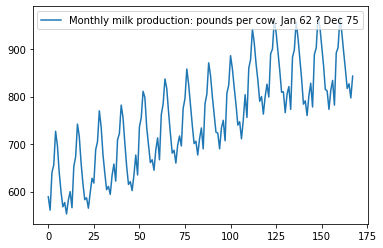

In [51]:
df.plot()

In [52]:
df.columns = ['ds' , 'y']

In [53]:
df.head()

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [54]:
 df['ds'] = pd.to_datetime(df['ds'])

In [55]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [18]:
 df.plot()

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f5d4963da60> (for post_execute):


ValueError: ignored

ValueError: ignored

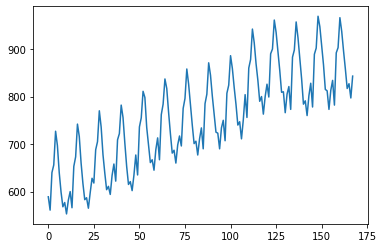

In [56]:
df['y'].plot()

Convert the data into stationary data.
If by one shift it's not becoming stationary , then shift until and unless you feel it as a stationary data

In [20]:
df['y'].shift(1) 

0        NaN
1      589.0
2      561.0
3      640.0
4      656.0
       ...  
163    896.0
164    858.0
165    817.0
166    827.0
167    797.0
Name: y, Length: 168, dtype: float64

In [21]:
df['y'] = df['y'] - df['y'].shift(1) ###don't do it not neccessary

In [57]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


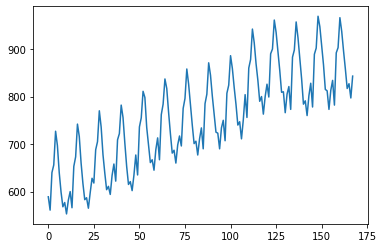

In [58]:
df['y'].plot()

In [59]:
from fbprophet import Prophet

In [60]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [61]:
###initialise the model
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [62]:
model

In [63]:
model.seasonalities

OrderedDict([('yearly',
              {'condition_name': None,
               'fourier_order': 10,
               'mode': 'additive',
               'period': 365.25,
               'prior_scale': 10.0})])

In [64]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [65]:
###  Create future dates of 365 days
future_days = model.make_future_dataframe(periods=365)

In [66]:
###predictions
pred = model.predict(future_days)

In [67]:
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,606.941323,576.831591,596.787327,606.941323,606.941323,-20.151798,-20.151798,-20.151798,-20.151798,-20.151798,-20.151798,0.0,0.0,0.0,586.789525
1,1962-02-01,608.656256,536.244928,556.334719,608.656256,608.656256,-62.588619,-62.588619,-62.588619,-62.588619,-62.588619,-62.588619,0.0,0.0,0.0,546.067637
2,1962-03-01,610.205228,632.362449,651.646301,610.205228,610.205228,31.365739,31.365739,31.365739,31.365739,31.365739,31.365739,0.0,0.0,0.0,641.570967
3,1962-04-01,611.920161,648.273671,669.091620,611.920161,611.920161,46.703773,46.703773,46.703773,46.703773,46.703773,46.703773,0.0,0.0,0.0,658.623935
4,1962-05-01,613.579774,711.947344,731.746630,613.579774,613.579774,108.040207,108.040207,108.040207,108.040207,108.040207,108.040207,0.0,0.0,0.0,721.619981


In [68]:
pred[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
528,1976-11-26,815.347638,803.705957,826.448426
529,1976-11-27,818.479106,806.628911,829.751711
530,1976-11-28,821.790064,810.024739,833.013779
531,1976-11-29,825.219679,813.848628,835.967345
532,1976-11-30,828.699914,817.508290,839.159788


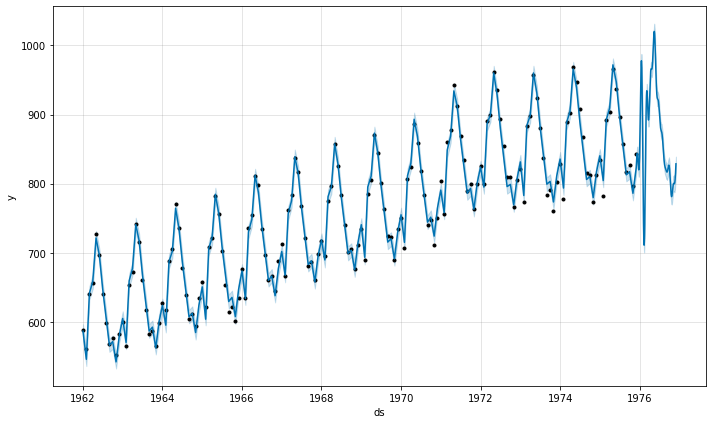

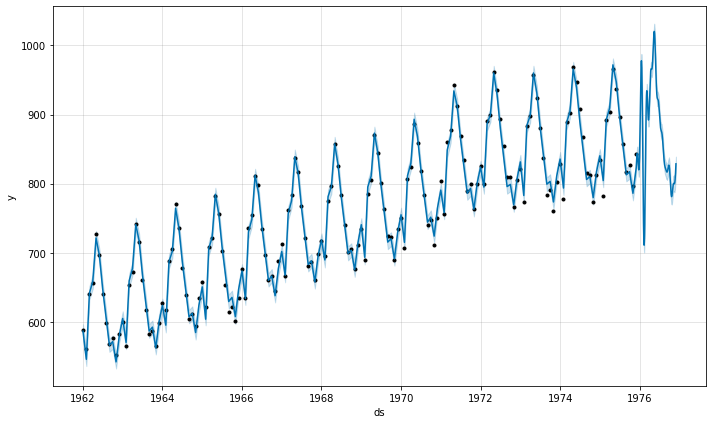

In [69]:
 ###plot predicted projection
 model.plot(pred)

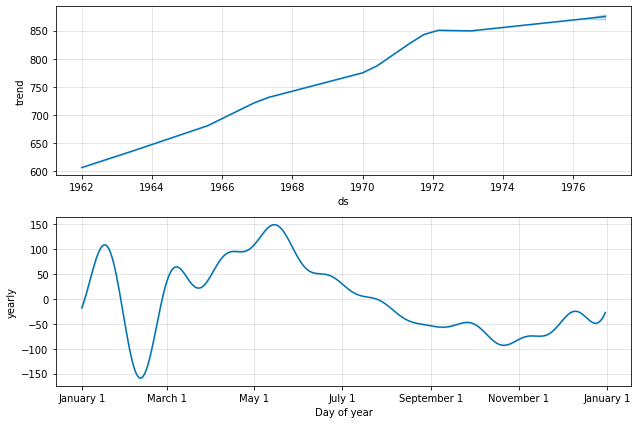

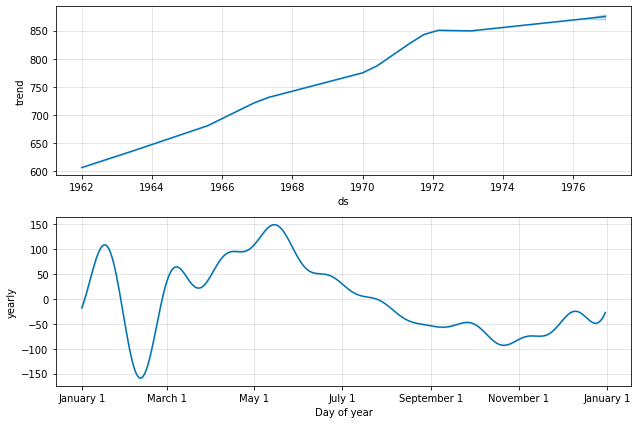

In [70]:
###visualize each component [Trends,Weekly]
model.plot_components(pred)

In [71]:
from fbprophet.diagnostics import cross_validation


In [72]:
df_cv = cross_validation(model,horizon='365 days',period='180 days',initial='1095 days')

INFO:fbprophet:Making 21 forecasts with cutoffs between 1965-01-22 00:00:00 and 1974-12-01 00:00:00


In [73]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-02-01,630.734519,628.654693,632.724353,622.0,1965-01-22
1,1965-03-01,715.209269,708.427237,721.965343,709.0,1965-01-22
2,1965-04-01,738.046179,724.331307,753.635018,722.0,1965-01-22
3,1965-05-01,809.508773,788.264012,831.825320,782.0,1965-01-22
4,1965-06-01,778.278652,746.936401,809.389976,756.0,1965-01-22


example - 
1964 - 1968
1964 - 1965 --- Train
1965 - 1966 --- Test
1966 - 1968 --- Validation

In [74]:
from fbprophet.diagnostics import performance_metrics
df_performance = performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,255.110328,15.972174,12.522709,0.016138,0.014043,0.36
1,41 days,253.085086,15.908648,12.440669,0.016069,0.014043,0.36
2,42 days,267.466632,16.354407,12.890051,0.016696,0.014071,0.36
3,43 days,267.960409,16.369496,13.005926,0.016878,0.014071,0.36
4,46 days,252.637615,15.894578,12.615442,0.016331,0.014071,0.36


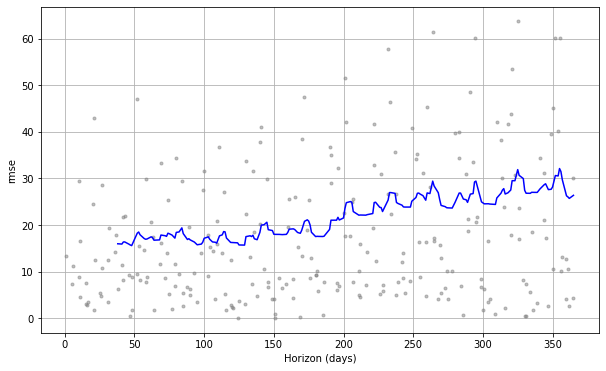

In [75]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv,metric='rmse')